# Тренировочные упражнения по визуализации данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly
import plotly.express as px

colors = sns.color_palette("pastel")

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
# Выкинем лишнюю колонку с номером строки в файле
churn_data.drop(columns = ['RowNumber'], inplace = True)

**9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

''

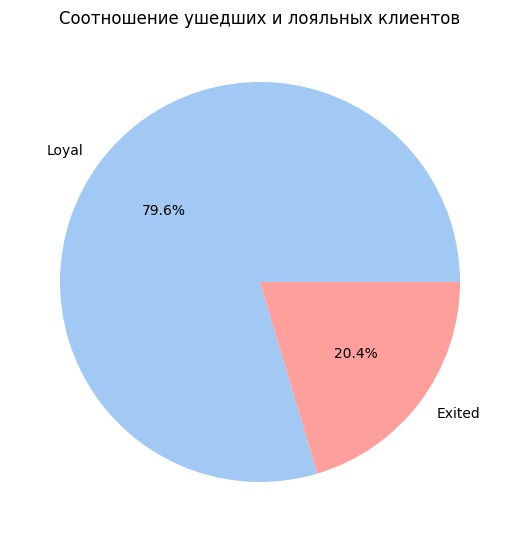

In [4]:
churn_stats = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_stats,
    labels=churn_stats.index.map({1:'Exited', 0: 'Loyal'}),
    autopct='%.1f%%',
    colors=[colors[0], colors[3]]
    
)
axes.set_title('Соотношение ушедших и лояльных клиентов');
;

Основная масса клиентов - лояльные. Уходит примерно 1/5 часть всех клиентов.

**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

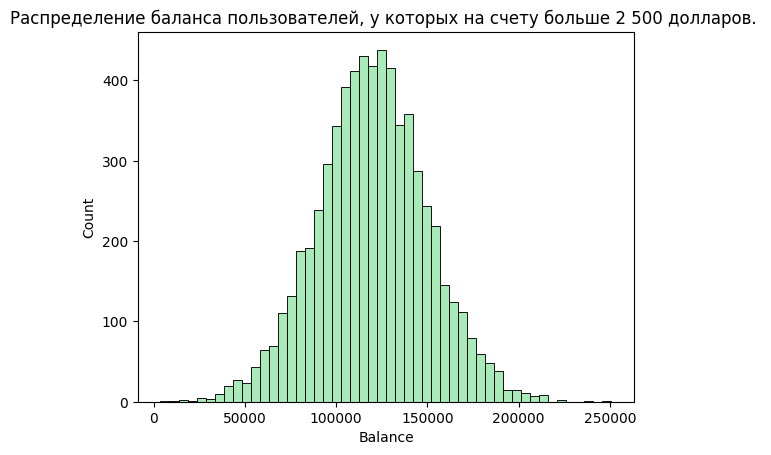

In [5]:
sns.histplot(
    data=churn_data[churn_data['Balance']>2500],
    x='Balance',
    bins=50,
    color=colors[2]
).set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов. ');

Распределение похоже на нормальное со средним балансом $\approx 125 000$ долларов.

**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

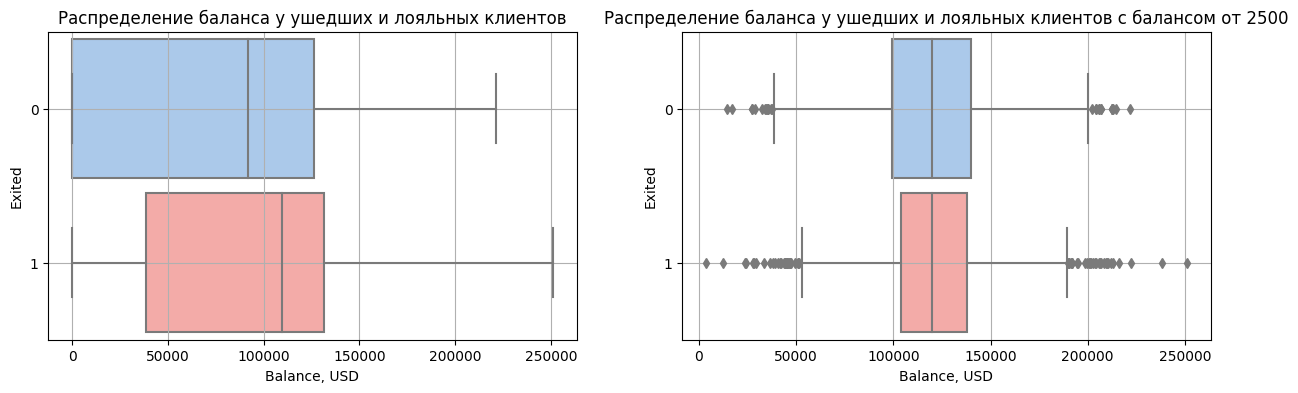

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    palette=[colors[0], colors[3]],
    ax = axes[0]
)
boxplot.set_title('Распределение баланса у ушедших и лояльных клиентов');
boxplot.set_xlabel('Balance, USD');
boxplot.grid()

boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance']>2500],
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    palette=[colors[0], colors[3]],
    ax = axes[1]
)
boxplot.set_title('Распределение баланса у ушедших и лояльных клиентов с балансом от 2500');
boxplot.set_xlabel('Balance, USD');
boxplot.grid()

Среди лояльных клиентов доля клиентов с балансои до 2 500 долларов - существенная (25-й кванитиль начинается в нуле). При этом если посмотреть на клиентов с суммой выше 2500, то распределия становятся похожими. Похоже, что среди ушедших выше концентрация людей, которые пытаются откладывать деньги. Вероятно, их не устраивают условия по накопительным счетам.

**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

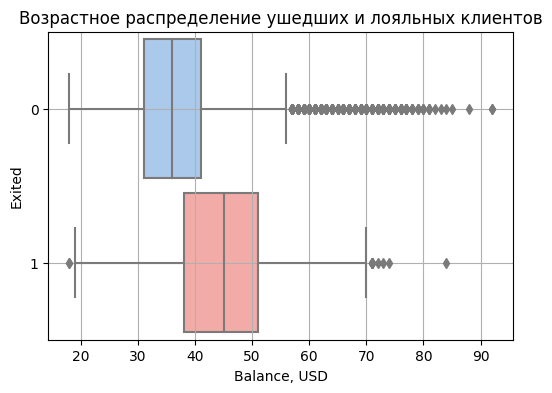

In [7]:
fig = plt.figure(figsize=(6, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
    palette=[colors[0], colors[3]]
)
boxplot.set_title('Возрастное распределение ушедших и лояльных клиентов');
boxplot.set_xlabel('Balance, USD');
boxplot.grid()

Больше потенциальных выброов среди лояльных клиентов (люди 55+ счиатются выбросами). Банку следует обратить внимание на возрастную категорию 40-50 лет - имменно они склонны уходить чаще всего.

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

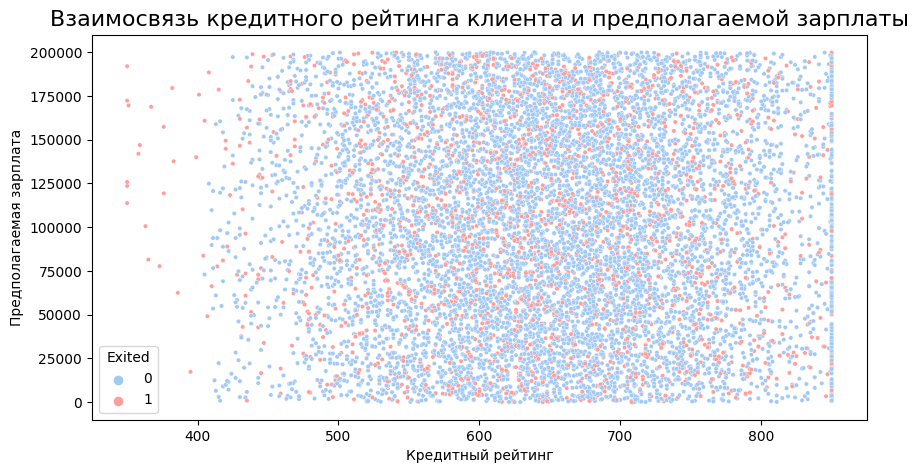

In [8]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=10,
    palette=[colors[0], colors[3]]
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата');

Явной взаимосвязи между кредитным рейтингом и предполагаемой зарплаты не заметно.

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

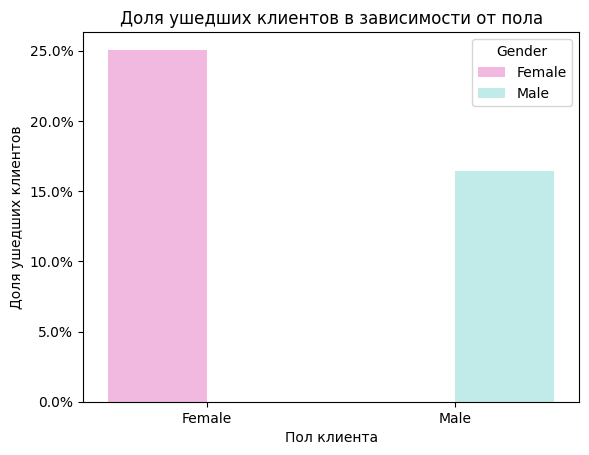

In [9]:
barplot = sns.barplot(
    data=churn_data.groupby('Gender')['Exited'].mean().reset_index(),
    x='Gender',
    y='Exited',
    hue='Gender',
    palette=[colors[6], colors[9]],
)
barplot.set_title('Доля ушедших клиентов в зависимости от пола');
barplot.set_ylabel('Доля ушедших клиентов');
barplot.set_xlabel('Пол клиента');
barplot.yaxis.set_major_formatter(mtick.PercentFormatter(1));

Женщины уходят чаще.

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

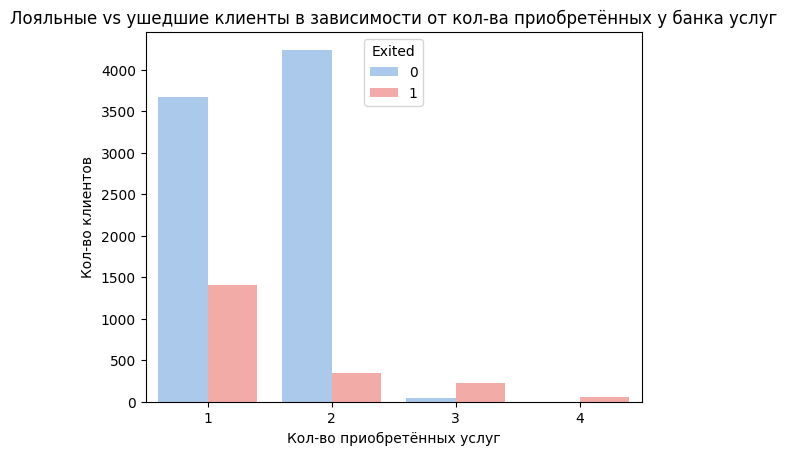

In [10]:
churn_by_pr = (
    churn_data.groupby(['NumOfProducts', 'Exited'])
    .agg(client_cnt = ('CustomerId', 'count'))
    .reset_index()
)
barplot = sns.barplot(
    data=churn_by_pr,
    x='NumOfProducts',
    y='client_cnt',
    hue='Exited',
    palette=[colors[0], colors[3]]
)
barplot.set_title('Лояльные vs ушедшие клиенты в зависимости от кол-ва приобретённых у банка услуг');
barplot.set_ylabel('Кол-во клиентов');
barplot.set_xlabel('Кол-во приобретённых услуг');

* Клиенты, которые приобретают больше двух услуг чаще уходят, чем остаются лояльными. Вероятно, какая-то избыточная услуга выводит их из себя.
* Больше всего лояльных клиентов среди пользователей двух услуг.
* Клиенты с одной услугой тоже чаще лояльны, чем нет. Но среди них отток активнее, чем среди клиентов с двумя услугами. Скорее всего, за счёт новичков, которые попробовали, и решили, что не хотят сотрудничать с этим банком.

**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

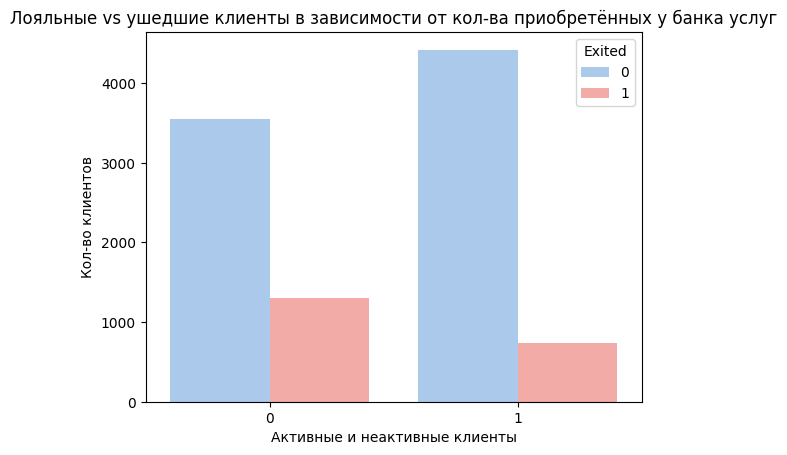

In [11]:
churn_by_activ = (
    churn_data.groupby(['IsActiveMember', 'Exited'])
    .agg(client_cnt = ('CustomerId', 'count'))
    .reset_index()
)
barplot = sns.barplot(
    data=churn_by_activ,
    x='IsActiveMember',
    y='client_cnt',
    hue='Exited',
    palette=[colors[0], colors[3]]
)
barplot.set_title('Лояльные vs ушедшие клиенты в зависимости от кол-ва приобретённых у банка услуг');
barplot.set_ylabel('Кол-во клиентов');
barplot.set_xlabel('Активные и неактивные клиенты');

Среди неактивных клиентов меньше лояльных клиентов, и выше отток. Думаю, банку стоит предложить неактивным выгодные долгосрочные депозиты, чтобы им не хотелось забирать свои денежки.

**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [12]:
churn_by_country = churn_data.groupby('Geography')['Exited'].mean().reset_index()

fig = px.choropleth(
    data_frame=churn_by_country, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode="country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    title='Доля уходов по странам', #заголовок
    scope="europe",
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

В Германии отток клиентов в два раза выше, чем во Франции или Испании. Возможные причины:
* Немцы любят порядок и оттого более щепетильны в вопросах банковского обслуживания.
* Условия, которые предлагает банк в разных странах, - разные, и в Германии они менее выгодные.
* В Германии выше конкуренция со стороны других банков.

**9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data["CreditScoreCat"] = churn_data['CreditScore'].apply(get_credit_score_cat)

**Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**


In [14]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

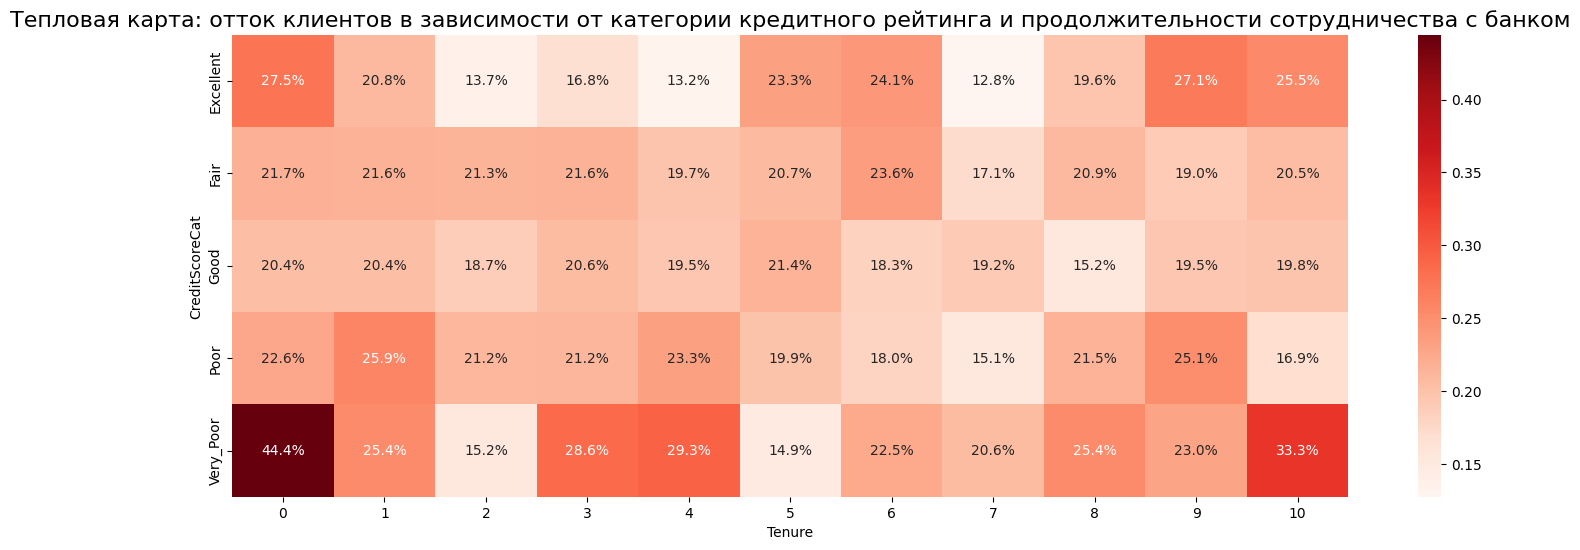

In [15]:
fig = plt.figure(figsize=(18, 6))
heatmap = sns.heatmap(data=pivot,
                      cmap='Reds' ,
                      annot=True,
                      fmt='.1%')
heatmap.set_title('Тепловая карта: отток клиентов в зависимости от категории кредитного рейтинга и продолжительности сотрудничества с банком', fontsize=16);

Самый большой отток наблюдается среди новых клинетов с самым низким кредитным рейтингом. Видимо, они приходят в банк в надежде взять кредит, получают отказ и уходят. В целом, клиеты с очень плохим кредитным рейтингом наименее лояльные из всех (при любом кол-ве лет взаимодействия с банком).